Data has no missing values
Range of transaction dates: 1/1/2011 - 9/9/2015
The no. of unique customers: 1000
*** Descriptive Statistics for Amount ***
Min: -1.0
Max: 2033.0
Variance: 1499.5411107517461
Standard Deviation: 38.72390877418945
****************************


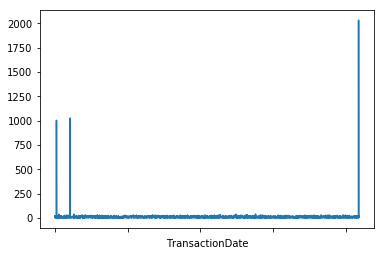

In [22]:
import pandas as pd

transactions = pd.read_csv('HW1 clv_transactions.csv', index_col = 'TransactionDate')

#To check if data has any missing values
if transactions.isnull().values.any():
    print('Data has missing values')
else:
    print('Data has no missing values')

#To find the range of Transaction Dates
print('Range of transaction dates: '+ transactions.index.min() + ' - ' + transactions.index.max())

#To find the no. of unique customers
print('The no. of unique customers: '+ str(transactions['CustomerID'].nunique()))

#To find the descriptive statistics on the dataset
amount = transactions['Amount']
print('*** Descriptive Statistics for Amount ***')
print('Min: ' + str(amount.min()))
print('Max: ' + str(amount.max()))
print('Variance: ' + str(amount.var()))
print('Standard Deviation: ' + str(amount.std()))
print('****************************')

#To check if transaction amount has increased over time due to inflation
amount.plot()